# Desafío - Gráficos y correlación

#### 1. Importar librerías y .csv

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv('./nations.csv', encoding='latin_1')

#### 2. Refactor gráficos matplotlib a seaborn

##### a) Histogramas

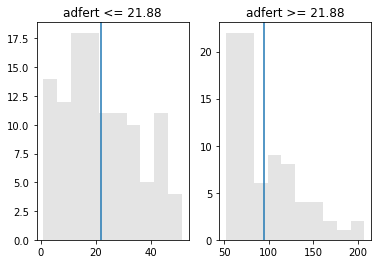

In [12]:
def binarize_histogram(dataframe, variable):
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1,
    0)
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    plt.subplot(1, 2, 1)
    plt.hist(hist_0, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_0))
    plt.title("{0} <= {1}".format(variable, round(np.mean(hist_0), 3)))
    plt.subplot(1, 2, 2)
    plt.hist(hist_1, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_1))
    plt.title("{0} >= {1}".format(variable, round(np.mean(hist_0), 3)))
binarize_histogram(df, 'adfert')

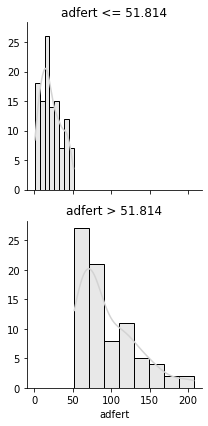

In [71]:
def binarize_histogram_sns(dataframe, variable):
    tmp = dataframe
    mean = np.mean(tmp[variable])
    tmp['binarize'] = np.where(tmp[variable] > mean, 1, 0)

    grid = sns.FacetGrid(tmp, col='binarize', col_wrap=1)
    hist = grid.map(sns.histplot, variable, kde=True, color='lightgrey')
    hist.axes[0].set_title("{0} <= {1}".format(variable, round(mean, 3)))
    hist.axes[1].set_title("{0} > {1}".format(variable, round(mean, 3)))
binarize_histogram_sns(df, 'adfert')